# Portfolio optimization

## Imports

In [ ]:
import sys
import numpy as np
import numpy.random as npr
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import trange
%matplotlib inline

torch.set_default_dtype(torch.float)

In [ ]:
# To reload the module
%load_ext autoreload
%autoreload 2
sys.path.append('../')
from portfolio.portfolio_class import Portfolio
from portfolio.portfolio_methods import CMV_actor_critic, CMV_actor_critic_dis
from src.utils import fix_seeds
from src.network import Net, PolicyNetPortfolio

In [25]:
portfolio = Portfolio()
returns = []
portfolio.reset(0)
for i in range(portfolio.T-1):
    idx_action = npr.randint(low=0,high=portfolio.num_actions) #random
    state,reward= portfolio.act(idx_action)
    returns.append(portfolio.total_reward)
plt.plot(returns)
plt.title("Cumulated rewards as a function of time")
plt.xlabel("time")
plt.ylabel("Returns")
plt.show()

36.87729959954183


## Stochastic Policy

In [36]:
p_RF_LV = []
p_R_LV = []
p_NI_LV = []

p_RF_MV = []
p_R_MV = []
p_NI_MV = []

p_RF_HV = []
p_R_HV = []
p_NI_HV = []

tab_pen = np.linspace(0,1.5)

for pen in tab_pen:
    fix_seeds()
    policy_model = PolicyNetPortfolio(1, portfolio.num_actions)
    portfolio = Portfolio()
    cmv = CMV_actor_critic(policy_model, portfolio, n_epochs=2000, lambd=pen, lr=0.002, alpha=0.2)
    RF,R = portfolio.actions[np.argmax(policy_model.forward(torch.tensor(0, dtype=torch.float).unsqueeze(0)).detach())]
    print(RF,R)
    p_RF_LV.append(RF/portfolio.max_invest)
    p_R_LV.append(R/portfolio.max_invest)
    p_NI_LV.append((portfolio.max_invest-RF-R)/portfolio.max_invest)
    RF,R = portfolio.actions[np.argmax(policy_model.forward(torch.tensor(1, dtype=torch.float).unsqueeze(0)).detach())]
    print(RF,R)
    p_RF_MV.append(RF/portfolio.max_invest)
    p_R_MV.append(R/portfolio.max_invest)
    p_NI_MV.append((portfolio.max_invest-RF-R)/portfolio.max_invest)
    RF,R = portfolio.actions[np.argmax(policy_model.forward(torch.tensor(2, dtype=torch.float).unsqueeze(0)).detach())]
    print(RF,R)
    p_RF_HV.append(RF/portfolio.max_invest)
    p_R_HV.append(R/portfolio.max_invest)
    p_NI_HV.append((portfolio.max_invest-RF-R)/portfolio.max_invest)

  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

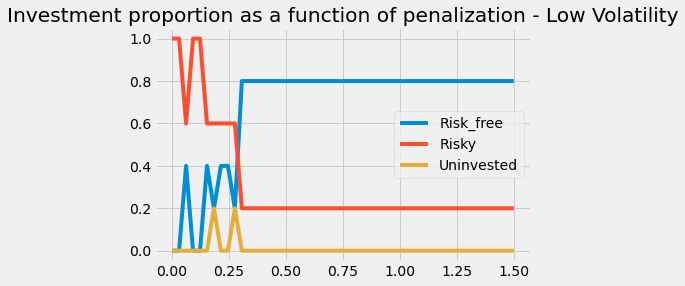

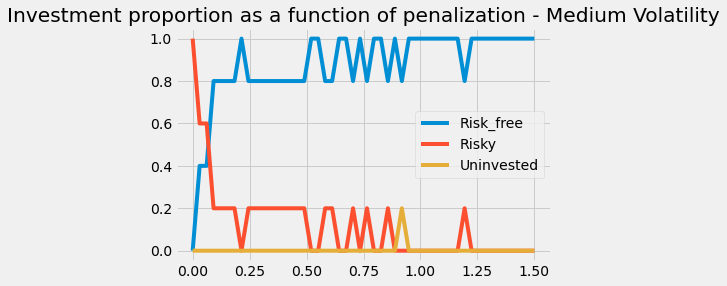

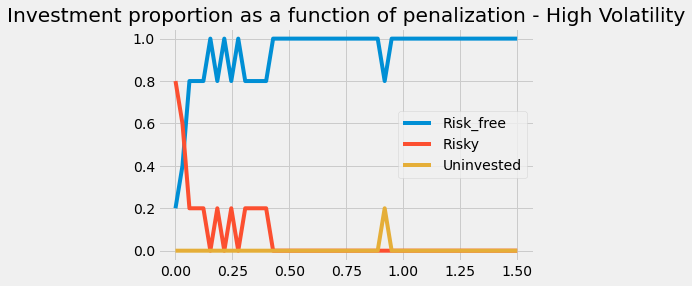

In [60]:
plt.style.use('fivethirtyeight')
plt.plot(tab_pen,p_RF_LV, label="Risk_free")
plt.plot(tab_pen,p_R_LV, label="Risky")
plt.plot(tab_pen,p_NI_LV, label="Uninvested")
plt.legend()
plt.title("Investment proportion as a function of penalization - Low Volatility")
plt.show()

plt.plot(tab_pen,p_RF_MV, label="Risk_free")
plt.plot(tab_pen,p_R_MV, label="Risky")
plt.plot(tab_pen,p_NI_MV, label="Uninvested")
plt.legend()
plt.title("Investment proportion as a function of penalization - Medium Volatility")
plt.show()

plt.plot(tab_pen,p_RF_HV, label="Risk_free")
plt.plot(tab_pen,p_R_HV, label="Risky")
plt.plot(tab_pen,p_NI_HV, label="Uninvested")
plt.legend()
plt.title("Investment proportion as a function of penalization - High Volatility")
plt.show()

In [55]:
fix_seeds()
portfolio = Portfolio(T=10)
nb_epochs = 2000
pen = 0.5
m=100
V_min=10
V_max=120
policy_model = PolicyNetPortfolio(1, portfolio.num_actions)
cmv = CMV_actor_critic_dis(policy_model, portfolio, nb_epochs, m, V_min,V_max, init_state=0, lambd=0., lr=0.0045, alpha=0.4)

  0%|          | 0/2000 [00:00<?, ?it/s]

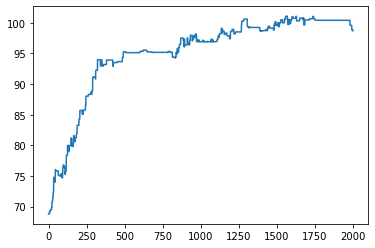

In [58]:
plt.plot(cmv)

In [59]:
print(portfolio.actions[np.argmax(policy_model.forward(torch.tensor(0, dtype=torch.float).unsqueeze(0)).detach())
])
print(portfolio.actions[np.argmax(policy_model.forward(torch.tensor(1, dtype=torch.float).unsqueeze(0)).detach())
])
print(portfolio.actions[np.argmax(policy_model.forward(torch.tensor(2, dtype=torch.float).unsqueeze(0)).detach())
])

(2, 3)
(2, 3)
(3, 2)


In [ ]:
p_RF_LV = []
p_R_LV = []
p_NI_LV = []

p_RF_MV = []
p_R_MV = []
p_NI_MV = []

p_RF_HV = []
p_R_HV = []
p_NI_HV = []

tab_pen = np.linspace(0,1.5)
nb_epochs = 3000
pen = 0.
m=100
V_min=10
V_max=120
theta = np.linspace(V_min, V_max, m)

for pen in tab_pen:
    fix_seeds()
    policy_model = PolicyNetPortfolio(1, portfolio.num_actions)
    portfolio = Portfolio()
    cmv = CMV_actor_critic_dis(policy_model, portfolio, nb_epochs, m, V_min,V_max, init_state=0, lambd=pen, lr=0.0045, alpha=0.4)    
    RF,R = portfolio.actions[np.argmax(policy_model.forward(torch.tensor(0, dtype=torch.float).unsqueeze(0)).detach())
]
    p_RF_LV.append(RF/portfolio.max_invest)
    p_R_LV.append(R/portfolio.max_invest)
    p_NI_LV.append((portfolio.max_invest-RF-R)/portfolio.max_invest)
    RF,R = portfolio.actions[np.argmax(policy_model.forward(torch.tensor(1, dtype=torch.float).unsqueeze(0)).detach())
]
    p_RF_MV.append(RF/portfolio.max_invest)
    p_R_MV.append(R/portfolio.max_invest)
    p_NI_MV.append((portfolio.max_invest-RF-R)/portfolio.max_invest)
    RF,R = portfolio.actions[np.argmax(policy_model.forward(torch.tensor(2, dtype=torch.float).unsqueeze(0)).detach())
]
    p_RF_HV.append(RF/portfolio.max_invest)
    p_R_HV.append(R/portfolio.max_invest)
    p_NI_HV.append((portfolio.max_invest-RF-R)/portfolio.max_invest)

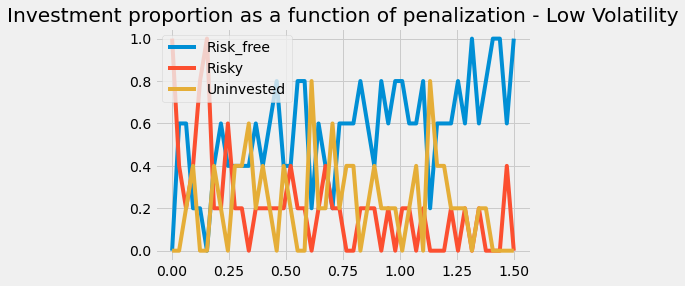

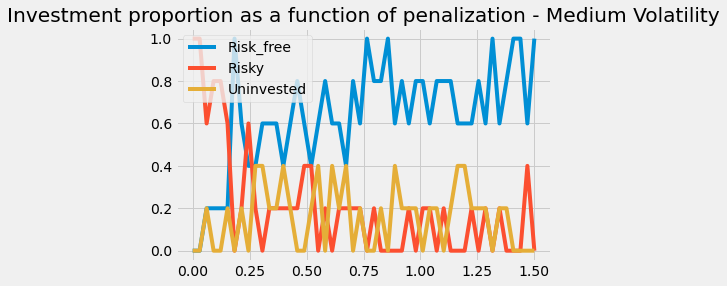

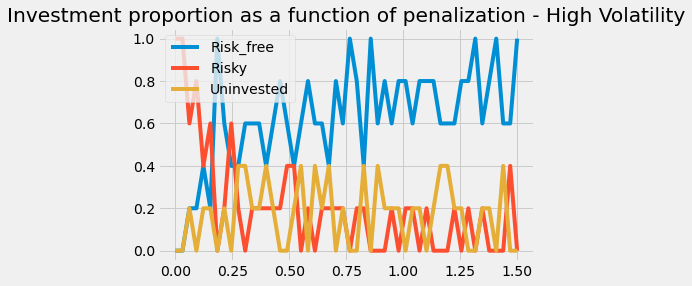

In [8]:
plt.style.use('fivethirtyeight')
plt.plot(tab_pen,p_RF_LV, label="Risk_free")
plt.plot(tab_pen,p_R_LV, label="Risky")
plt.plot(tab_pen,p_NI_LV, label="Uninvested")
plt.legend()
plt.title("Investment proportion as a function of penalization - Low Volatility")
plt.show()

plt.plot(tab_pen,p_RF_MV, label="Risk_free")
plt.plot(tab_pen,p_R_MV, label="Risky")
plt.plot(tab_pen,p_NI_MV, label="Uninvested")
plt.legend()
plt.title("Investment proportion as a function of penalization - Medium Volatility")
plt.show()

plt.plot(tab_pen,p_RF_HV, label="Risk_free")
plt.plot(tab_pen,p_R_HV, label="Risky")
plt.plot(tab_pen,p_NI_HV, label="Uninvested")
plt.legend()
plt.title("Investment proportion as a function of penalization - High Volatility")
plt.show()

In [ ]:
from torch.distributions import Categorical


In [ ]:
def tab_returns(portfolio, policy_model, size, init_state):
    returns = []
    for _ in range(size):
        portfolio.reset(init_state)
        for t in range(portfolio.T-1):            
            state = portfolio.state

            # choose an action
            probs = policy_model.forward(torch.tensor(state, dtype=torch.float).unsqueeze(0))
            sampler = Categorical(probs)
            action = sampler.sample()

            # use that action in the environment
            new_state, reward = portfolio.act(action)
        returns.append(portfolio.total_reward)
    return returns

In [ ]:
tab_pen = np.linspace(0,1.5,10)
nb_epochs = 2000
pen = 0.
m=100
V_min=10
V_max=140
theta = np.linspace(V_min, V_max, m)

# tab_mean = []
tab_mean_dis = []

# tab_var = []
tab_var_dis = []

for pen in tab_pen:
    print(pen)
    # fix_seeds()
    # policy_model = PolicyNetPortfolio(1, portfolio.num_actions)
    # portfolio = Portfolio()
    # cmv = CMV_actor_critic(policy_model, portfolio, n_epochs=2000, lambd=pen, lr=0.002, alpha=0.2)
    # ret = tab_returns(portfolio, policy_model, 1000, 0)
    # tab_mean.append(np.mean(ret))
    # tab_var.append(np.var(ret))

    fix_seeds()
    portfolio = Portfolio()
    policy_model = PolicyNetPortfolio(1, portfolio.num_actions)
    cmv_dis = CMV_actor_critic_dis(policy_model, portfolio, nb_epochs, m, V_min,V_max, init_state=0, lambd=pen, lr=0.0045, alpha=0.4)    
    ret = tab_returns(portfolio, policy_model, 1000, 0)
    tab_mean_dis.append(np.mean(ret))
    tab_var_dis.append(np.var(ret))
    

0.0


  0%|          | 0/2000 [00:00<?, ?it/s]

: 

: 

In [3]:
tab_mean = np.load("tab_mean.npy")
tab_mean_dis = np.load("tab_mean_dis.npy")
tab_var = np.load("tab_var.npy")
tab_var_dis = np.load("tab_var_dis.npy")

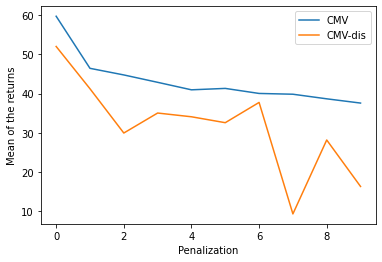

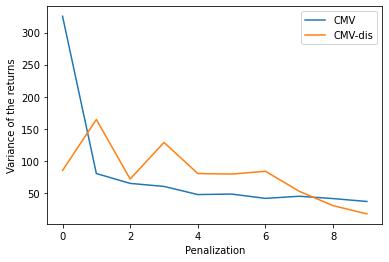

In [4]:
plt.plot(tab_mean, label="CMV")
plt.plot(tab_mean_dis, label="CMV-dis")
plt.xlabel("Penalization")
plt.ylabel("Mean of the returns")
plt.legend()
plt.plot()
plt.show()

plt.plot(tab_var, label="CMV")
plt.plot(tab_var_dis, label="CMV-dis")
plt.xlabel("Penalization")
plt.ylabel("Variance of the returns")
plt.legend()
plt.plot()
plt.show()

## Efficient Frontier

In [10]:
portfolio = Portfolio()
init_state = 2

n_portofolio = 500
n_test = 3000

esp = []
var = []
sr = []

for _ in trange(n_portofolio):
    returns=[]
    actions = npr.randint(low=0, high=portfolio.num_actions, size=portfolio.T-1)
    for __ in range(n_test):
        portfolio.reset(init_state)
        for t in range(portfolio.T-1):
            idx_action= actions[t]
            state,reward= portfolio.act(idx_action)
        returns.append(portfolio.total_reward)
    esp.append(np.mean(returns))
    var.append(np.var(returns))
    sr.append(esp[-1]/np.sqrt(var[-1]))

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
max_sharpe_idx = np.argmax(sr)
sdp, rp = var[max_sharpe_idx], esp[max_sharpe_idx]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
plt.scatter(var,esp,c=sr,cmap='inferno', marker='o') # ,s=10, alpha=0.3
plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.colorbar()
plt.xlabel("Variance")
plt.ylabel("Mean")
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.legend()
plt.show()